<a href="https://colab.research.google.com/github/CFathurrohman/10_Cyndu-Fathur-Rohman_PCVK_Ganjil_2024/blob/main/Week10_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementasi hasil citra yang telah diproses dengan GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat pada KTP.

In [23]:
# Install Tesseract
!!apt-get install -y tesseract-ocr-ind
!pip install pytesseract

# Set path Tesseract di Colab
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Teks yang Terbaca dari KTP:
PROVINSI SULAWESI SELATAN

 

 

KABUPATEN SOPPENG

NIK : ?312042510”720002
Nama ABDURRAUF. S.Pd, M.Pd
Tempat/Tgi Lahir : CELLENGENGE. 25-10-1972
Jenis kelamin LAKI-LAKI Gol. Darah .O
Alamat 1 JL. MERDEKA NO.43

RTRW 1 001/004

Kel/Desa BILA

Kecamatan - LALABATA
Agama ISLAM
Status Perkawinan: KAWIN “
Pekerjaan PEGAWAI NEGERI SIPIL (PNS) SOPPENG
Kewarganegaraan. WNI 30-03-2021

Berlaku Hingga. SEUMUR HIDUP



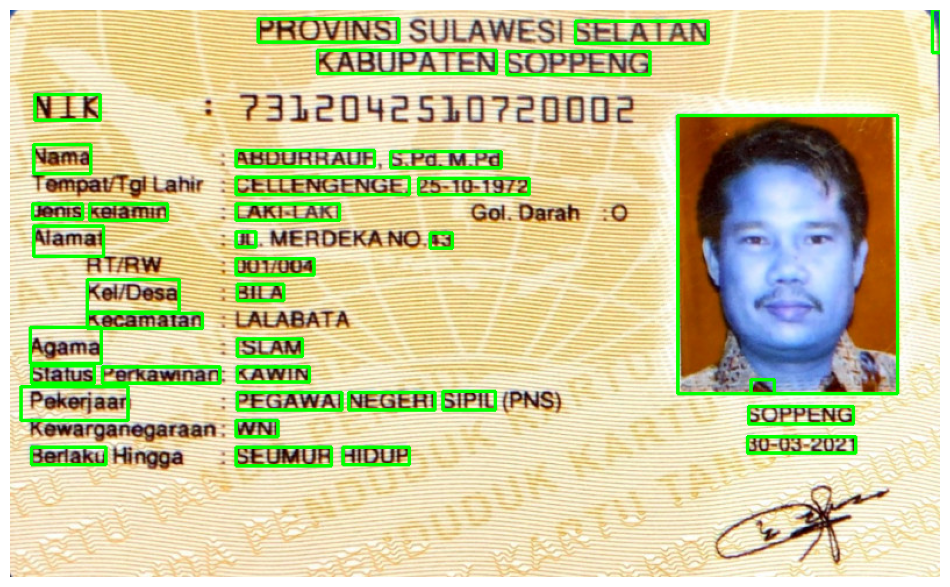

In [35]:
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from pytesseract import Output

# Fungsi untuk menampilkan gambar
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)
    plt.axis('off')

# Mengakses Google Drive
drive.mount('/content/drive')

# Load gambar KTP
filename = '/content/drive/MyDrive/PCVK_MM/Images/KTP.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Terapkan thresholding
_, threshed = cv2.threshold(gray, 130, 255, cv2.THRESH_TRUNC)

# Terapkan OCR dan ambil informasi bounding box
text_data = pytesseract.image_to_data(threshed, output_type=Output.DICT)
n_boxes = len(text_data['text'])

# Gambarkan bounding box di sekitar teks yang terdeteksi
for i in range(n_boxes):
    if int(text_data['conf'][i]) > 60:
        (x, y, w, h) = (text_data['left'][i], text_data['top'][i], text_data['width'][i], text_data['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Tampilkan gambar dengan bounding box
display(img, cmap='gray')

# Cetak teks yang terdeteksi
text_string = pytesseract.image_to_string(threshed, lang="ind")
print("Teks yang Terbaca dari KTP:")
print(text_string)
